**Load Libraries**

In [54]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pickle as pkl
import tsfresh as tsf
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Data Preprocessing

### Define Functions

In [85]:
def loadDataFrames(name, pathAcc, pathGyr, pathOri):
    df_Acc= pd.read_csv(pathAcc)
    df_Gyr= pd.read_csv(pathGyr)
    df_Ori= pd.read_csv(pathOri)
    print("Data Frames for " + name + " loaded.")
    return df_Acc, df_Gyr, df_Ori

def loadJsonData(name, pathJson):
    df = pd.read_json(pathJson)
    print("Data Frame for " + name + " loaded.")
    return df	   

#Concat Funktion
def concatDataFrames(name, df_Acc, df_Gyr, df_Ori):
  df_Gyr.drop(['time','seconds_elapsed'], axis=1, inplace=True)
  df_Ori.drop(['time','seconds_elapsed'], axis=1, inplace=True)
  df = pd.concat([df_Acc, df_Gyr, df_Ori], axis=1)
  print("Data Frames for " + name + " concatenated.")
  return df

#Function to plot Gyr Data
def plotDataGyr(data, title):
    plt.plot(data['time'], data['z'], color='red', marker='.')
    plt.plot(data['time'], data['y'], color='blue', marker='.')
    plt.plot(data['time'], data['x'], color='green', marker='.')
    plt.xlabel('time')
    plt.ylabel('x,y,z')
    plt.legend(['z', 'y', 'x'])
    plt.title(title)
    plt.show()

#Function to Plot Acc Data
def plotDataAcc(data, title):
    plt.plot(data['time'], data['z'], color='red', marker='.')
    plt.plot(data['time'], data['y'], color='blue', marker='.')
    plt.plot(data['time'], data['x'], color='green', marker='.')
    plt.xlabel('time')
    plt.ylabel('x,y,z')
    plt.legend(['z', 'y', 'x'])
    plt.title(title)
    plt.show()

#Function to Plot Ori Data
def plotDataOri(data, title):
    plt.plot(data['time'], data['qz'], color='red', marker='.')
    plt.plot(data['time'], data['qy'], color='blue', marker='.')
    plt.plot(data['time'], data['qx'], color='green', marker='.')
    plt.plot(data['time'], data['qw'], color='yellow', marker='.')
    #plt.plot(data['time'], data['roll'], color='black', marker='.')
    plt.xlabel('time')
    plt.ylabel('qz,qy,qx,qw,roll')
    plt.legend(['qz', 'qy', 'qx', 'qw', 'roll'])
    plt.title(title)
    plt.show()

#Clean unused Sensors
def deleteSensorData(df):
  notUsedSensors = ['Annotation', 'Barometer', 'Battery', 'Brightness', 'Gravity', 'Light', 'Location', 'Magnetometer', 'MagnetometerUncalibrated', 'Microphone']
  df = df[~df['sensor'].isin(notUsedSensors)]
  return df


#Clean Function Json Data
def cleanDataJson(df):
    #Drop unused Columns
    columns_to_drop = ['sensor', 'sensors', 'version','device name','recording time','platform','appVersion', 'device id', 'sampleRateMs','relativeAltitude','pressure', 'batteryLevel', 'batteryState', 'lowPowerMode','brightness', 'lux', 'bearingAccuracy', 'speedAccuracy', 'verticalAccuracy', 'horizontalAccuracy', 'speed', 'bearing','altitude', 'longitude', 'latitude']
    columns_to_drop = list(set(columns_to_drop).intersection(df.columns))

    if columns_to_drop:
        df.drop(columns=columns_to_drop, inplace=True)
        print("Spalten wurden erfolgreich entfernt.")
    else:
        print("Keine der Spalten zum Entfernen gefunden.")
        #df.drop(['version','device name','recording time','platform','appVersion', 'device id', 'sampleRateMs' ], axis=1, inplace=True)
    return df

#Only use Accelometer Data
def onlyAccData(df):
    df = df[df['sensor'] == 'Accelerometer']
    df = df.dropna(axis=1, how='all')
    return df


### Load Data and give them a name

In [103]:
#load mixed data
df_mixed_Acc, df_mixed_Gyr, df_mixed_Ori =loadDataFrames('mixed','data/MixedData/Accelerometer.csv', 'data/MixedData/Gyroscope.csv', 'data/MixedData/Orientation.csv')

##############################################################################################################

#load data frames for walking
#df_walk_Acc, df_walk_Gyr, df_walk_Ori =loadDataFrames('walking','data/NormalWalk/Accelerometer.csv', 'data/NormalWalk/Gyroscope.csv', 'data/NormalWalk/Orientation.csv')
df_walk1 = loadJsonData('walking 1', 'data/NormalWalk/NormalWalk.json')

#load data walk2
#df_walk2_Acc, df_walk2_Gyr, df_walk2_Ori =loadDataFrames('walking 2','data/Walk2/Accelerometer.csv', 'data/Walk2/Gyroscope.csv', 'data/Walk2/Orientation.csv')
df_walk2 = loadJsonData('walking 2', 'data/Walk2/Walk2.json')

#load data walk3 Alex
df_walk3 = loadJsonData('walking 3', 'data\Alex_Rumstehen_-2023-05-02_15-30-58.json')

#load data walk4 Alex
df_walk4 = loadJsonData('walking 4', 'data\Alex_Rumstehen_2-2023-05-23_14-53-09.json')


##############################################################################################################

#load data frames for push ups
#df_push_Acc, df_push_Gyr, df_push_Ori =loadDataFrames('push ups','data/PushUps/Accelerometer.csv', 'data/PushUps/Gyroscope.csv', 'data/PushUps/Orientation.csv')
df_push1 = loadJsonData('push ups 1', 'data/PushUps/PushUps.json')

#load data pushups2
#df_push2_Acc, df_push2_Gyr, df_push2_Ori =loadDataFrames('push ups 2','data/PushUps2/Accelerometer.csv', 'data/PushUps2/Gyroscope.csv', 'data/PushUps2/Orientation.csv')
df_push2 = loadJsonData('push ups 2', 'data/PushUps2/PushUps2.json')

#load data pushups3 Alex
df_push3 = loadJsonData('push ups 3', 'data/Alex_Push_Up_2-2023-05-23_15-04-54.json')

#load data pushups4 Alex
df_push4 = loadJsonData('push ups 4', 'data\Alex_10_Liegestütz-2023-05-02_15-29-25.json')

#load data pushups5 Pierre
df_push5 = loadJsonData('push ups 5', 'data\PushUps-pierre.json')

##############################################################################################################

#load data frames for jumping jacks
#df_JJ_Acc, df_JJ_Gyr, df_JJ_Ori =loadDataFrames('jumping jacks ','data/JJ_rightHand/Accelerometer.csv', 'data/JJ_rightHand/Gyroscope.csv', 'data/JJ_rightHand/Orientation.csv')
df_JJ1 = loadJsonData('jumping jacks 1', 'data/JJ_rightHand/JJ1.json')

#load data JJ2
#df_JJ2_Acc, df_JJ2_Gyr, df_JJ2_Ori =loadDataFrames('jumping jacks 2','data/JJ2/Accelerometer.csv', 'data/JJ2/Gyroscope.csv', 'data/JJ2/Orientation.csv')
df_JJ2 = loadJsonData('jumping jacks 2', 'data/JJ2/JJ2.json')

#load data JJ3 Alex
df_JJ3 = loadJsonData('jumping jacks 3', 'data/Alex_10_Hampelmänner-2023-05-02_15-30-18.json')

#load data JJ4 Pierre
df_JJ4 = loadJsonData('jumping jacks 4', 'data/JumpingsJacks-pierre-1.json')

#load data JJ5 Pierre
df_JJ5 = loadJsonData('jumping jacks 5', 'data/JumpingsJacks-pierre-2.json')

Data Frames for mixed loaded.
Data Frame for walking 1 loaded.
Data Frame for walking 2 loaded.
Data Frame for walking 3 loaded.
Data Frame for walking 4 loaded.
Data Frame for push ups 1 loaded.
Data Frame for push ups 2 loaded.
Data Frame for push ups 3 loaded.
Data Frame for push ups 4 loaded.
Data Frame for push ups 5 loaded.
Data Frame for jumping jacks 1 loaded.
Data Frame for jumping jacks 2 loaded.
Data Frame for jumping jacks 3 loaded.
Data Frame for jumping jacks 4 loaded.
Data Frame for jumping jacks 5 loaded.


In [104]:
#alle dataframes in eine liste 
allDf = [df_walk1, df_walk2, df_walk3, df_walk4, df_push1, df_push2, df_push3, df_push4, df_push5, df_JJ1, df_JJ2, df_JJ3, df_JJ4, df_JJ5]

In [105]:
#Only use the Accelerometer Data iterate over all dataframes
df_walk1 = onlyAccData(df_walk1)
df_walk2 = onlyAccData(df_walk2)
df_walk3 = onlyAccData(df_walk3)
df_walk4 = onlyAccData(df_walk4)
df_push1 = onlyAccData(df_push1)
df_push2 = onlyAccData(df_push2)
df_push3 = onlyAccData(df_push3)
df_push4 = onlyAccData(df_push4)
df_push5 = onlyAccData(df_push5)
df_JJ1 = onlyAccData(df_JJ1)
df_JJ2 = onlyAccData(df_JJ2)
df_JJ3 = onlyAccData(df_JJ3)
df_JJ4 = onlyAccData(df_JJ4)
df_JJ5 = onlyAccData(df_JJ5)

#drop sensor column
df_walk1 = df_walk1.drop(columns=['sensor'])
df_walk2 = df_walk2.drop(columns=['sensor'])
df_walk3 = df_walk3.drop(columns=['sensor'])
df_walk4 = df_walk4.drop(columns=['sensor'])
df_push1 = df_push1.drop(columns=['sensor'])
df_push2 = df_push2.drop(columns=['sensor'])
df_push3 = df_push3.drop(columns=['sensor'])
df_push4 = df_push4.drop(columns=['sensor'])
df_push5 = df_push5.drop(columns=['sensor'])
df_JJ1 = df_JJ1.drop(columns=['sensor'])
df_JJ2 = df_JJ2.drop(columns=['sensor'])
df_JJ3 = df_JJ3.drop(columns=['sensor'])
df_JJ4 = df_JJ4.drop(columns=['sensor'])
df_JJ5 = df_JJ5.drop(columns=['sensor'])


#geht irgendwie nicht kp warum
#for df in allDf:
#    df = onlyAccData(df)
    

**Clean Up Json Data**

In [65]:
df_walk1 = deleteSensorData(df_walk1)
df_walk2 = deleteSensorData(df_walk2)
df_JJ1 = deleteSensorData(df_JJ1)
df_JJ2 = deleteSensorData(df_JJ2) 
df_push1 = deleteSensorData(df_push1)
df_push2 = deleteSensorData(df_push2)

In [95]:

#iterieren über alldf mit der funktioin cleandatajson
for df in allDf:
    df = cleanDataJson(df)

Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.
Keine der Spalten zum Entfernen gefunden.


In [26]:
df_walk1.describe()

,time,seconds_elapsed,z,y,x,qz,qy,qx,qw,roll,pitch,yaw
count,5.052000e+03,5052.000000,3375.000000,3375.000000,3375.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,1.682881e+18,14.346058,-0.070668,-0.247229,0.013657,-0.127767,0.215725,-0.319543,0.492777,0.769793,0.975094,0.008908
std,8.198006e+09,8.198006,2.013155,2.297561,1.960033,0.532667,0.392741,0.318049,0.231129,1.027377,0.713344,1.800885
min,1.682881e+18,0.113761,-10.472376,-19.543915,-12.545299,-0.953105,-0.708056,-0.792790,0.000083,-3.127478,-0.679715,-3.140655
25%,1.682881e+18,7.248982,-0.956470,-1.164876,-1.029062,-0.645438,-0.162629,-0.612545,0.294501,0.042526,1.099068,-1.386632
50%,1.682881e+18,14.350607,0.024129,-0.007636,-0.059627,-0.229349,0.212383,-0.375353,0.542476,0.866653,1.291218,0.119788
75%,1.682881e+18,21.458523,0.730430,0.893772,0.938869,0.415051,0.598199,-0.053658,0.681756,1.631679,1.415777,1.555345
max,1.682881e+18,28.503113,39.480579,7.832360,9.757957,0.771277,0.763218,0.268756,0.923564,3.138131,1.566113,3.139913


In [25]:
#Extract relevant feautres from the dataframes and save them in a new dataframe
df_walk1 = extract_features(df_walk1, column_id='seconds_elapsed')



ValueError: Column must not contain NaN values: seconds_elapsed

**Concat Dataframes**

In [ ]:
#Concat DataFrames Walk
df_walk1 = concatDataFrames('walking', df_walk_Acc, df_walk_Gyr, df_walk_Ori)

#Concat DataFrames PushUps
df_push1 = concatDataFrames('push ups', df_push_Acc, df_push_Gyr, df_push_Ori)

#Concat DataFrames JumpingJacks
df_JJ1 = concatDataFrames('jumping jacks', df_JJ_Acc, df_JJ_Gyr, df_JJ_Ori)

#Concat DataFrames JumpingJacks2
df_JJ2 = concatDataFrames('jumping jacks 2', df_JJ2_Acc, df_JJ2_Gyr, df_JJ2_Ori)

#Concat DataFrames PushUps2
df_push2 = concatDataFrames('push ups 2', df_push2_Acc, df_push2_Gyr, df_push2_Ori)

#Concat DataFrames Walk2
df_walk2 = concatDataFrames('walking 2', df_walk2_Acc, df_walk2_Gyr, df_walk2_Ori)



#Concat Mixed DataFrames
df_mixed = concatDataFrames('mixed', df_mixed_Acc, df_mixed_Gyr, df_mixed_Ori)
df_mixed.head(10)

# Plot Data

In [ ]:
df_push_Gyr.plot(x='time', y='z', kind='line')
df_push_Gyr.plot(x='time', y='y', kind='line')
df_push_Gyr.plot(x='time', y='x', kind='line')

In [ ]:
df_JJ3.plot(x='time', y='z', kind='line')

In [ ]:
#Plot Walk
plotDataGyr(df_walk_Gyr, 'Gyroscope Walk')

#Plot PushUps
plotDataGyr(df_push_Gyr, 'Gyroscope PushUps')

#Plot JumpingJacks
plotDataGyr(df_JJ_Gyr, 'Gyroscope JumpingJacks')

In [ ]:
#Plotting Accelerometer Data

#Plot Walk
plotDataAcc(df_walk_Acc, 'Accelerometer Walk')

#Plot PushUps
plotDataAcc(df_push_Acc, 'Accelerometer PushUps')

#Plot JumpingJacks
plotDataAcc(df_JJ_Acc, 'Accelerometer JumpingJacks')

In [ ]:
#Plot Walk
plotDataOri(df_walk_Ori, 'Orientation Walk')

#Plot PushUps
plotDataOri(df_push_Ori, 'Orientation PushUps')

#Plot JumpingJacks
plotDataOri(df_JJ_Ori, 'Orientation JumpingJacks')
    

# **KNN Classifikation**
1. Label Data
2. Concat Dataframes
3. Split Data
4. Train Model
5. Predict
6. Evaluate

### 1. Label Data

In [106]:
#Classification with KNN
#Function to label the data
def getData(data, label):
    data['label'] = label
    return data

#Label Data
#Label Data Walk
df_walk1 = getData(df_walk1, 'walk')
df_walk2 = getData(df_walk2, 'walk')
df_walk3 = getData(df_walk3, 'walk')
df_walk4 = getData(df_walk4, 'walk')


#Label Data PushUps
df_push1 = getData(df_push1, 'pushups')
df_push2 = getData(df_push2, 'pushups')
df_push3 = getData(df_push3, 'pushups')
df_push4 = getData(df_push4, 'pushups')
df_push5 = getData(df_push5, 'pushups')

#Label Data JumpingJacks
df_JJ1 = getData(df_JJ1, 'jumpingjacks')
df_JJ2 = getData(df_JJ2, 'jumpingjacks')
df_JJ3 = getData(df_JJ3, 'jumpingjacks')
df_JJ4 = getData(df_JJ4, 'jumpingjacks')
df_JJ5 = getData(df_JJ5, 'jumpingjacks')

In [107]:
#plot json data
df_push4.head(10)

,time,seconds_elapsed,z,y,x,label
0,1.683041e+18,0.281794,-0.465686,0.086654,-0.091597,pushups
1,1.683041e+18,0.291821,-0.216612,0.060574,-0.047214,pushups
2,1.683041e+18,0.301851,0.062978,0.038663,-0.008545,pushups
3,1.683041e+18,0.311883,0.161940,0.031845,0.056470,pushups
4,1.683041e+18,0.321918,0.224382,0.046912,0.119996,pushups
5,1.683041e+18,0.331954,0.227283,0.064189,0.147190,pushups
6,1.683041e+18,0.341991,0.232712,0.083530,0.145322,pushups
7,1.683041e+18,0.352028,0.168754,0.073375,0.138954,pushups
8,1.683041e+18,0.362051,0.056705,0.071613,0.119926,pushups
9,1.683041e+18,0.372072,-0.075214,0.078500,0.048600,pushups


### 2. Concat Dataframes

In [91]:
#Concat DataFrames
df = pd.concat([df_walk1, df_push1, df_JJ1], axis=0)
df_test = pd.concat([df_JJ2, df_push2, df_walk2], axis=0)

#Short Df_test for predciton
df_test= df_test.head(1517)



#Fill NaN Values with propagation
df.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)



#kein random split sondern spezifizieren
#erste 70% train, letzte 30% test
#fünf trainings df und quasi im train nur die ersten 3 und die zwei anderen dann als test

In [ ]:
#drop sensor column
df_push4 = df_push4.drop(columns=['sensor'])
df_push5 = df_push5.drop(columns=['sensor'])
df_JJ3 = df_JJ3.drop(columns=['sensor'])
df_JJ4 = df_JJ4.drop(columns=['sensor'])
df_JJ5 = df_JJ5.drop(columns=['sensor'])
df_walk3 = df_walk3.drop(columns=['sensor'])
df_walk4 = df_walk4.drop(columns=['sensor'])


In [108]:
#Concat all Dataframes into one
df = pd.concat([df_walk1, df_walk2, df_push1, df_push2, df_push3, df_JJ1, df_JJ2, df_JJ3], axis=0)
df_test = pd.concat([df_walk3, df_walk4, df_push4, df_push5, df_JJ4, df_JJ5], axis=0)

In [48]:
#Fill NaN Values with propagation
df.fillna(method='bfill', inplace=True)
df_test.fillna(method='bfill', inplace=True)

In [93]:
df.head(10)

,sensor,time,seconds_elapsed,z,y,x,label
0,Accelerometer,1.682881e+18,0.164202,1.847188,-0.263839,-0.200692,walk
1,Accelerometer,1.682881e+18,0.181075,1.497302,-0.561693,1.482270,walk
2,Accelerometer,1.682881e+18,0.197947,2.785852,-0.710702,1.841119,walk
3,Accelerometer,1.682881e+18,0.214821,2.930641,-1.078482,2.165328,walk
4,Accelerometer,1.682881e+18,0.231680,0.156104,0.280482,0.679241,walk
5,Accelerometer,1.682881e+18,0.248571,-0.947836,0.833590,-0.191006,walk
6,Accelerometer,1.682881e+18,0.265443,-1.895251,0.619292,-0.005770,walk
7,Accelerometer,1.682881e+18,0.282314,-2.377419,-0.013274,-0.148708,walk
8,Accelerometer,1.682881e+18,0.299193,-1.454557,-0.956503,0.051434,walk
9,Accelerometer,1.682881e+18,0.316060,0.230019,-1.034410,0.667315,walk


In [ ]:
print('Test: ', len(df_test))
print('Df: ', len(df))

df_test.drop(['label'], axis=1, inplace=True)

ToDo: Marvin
#gemischten Datensatz vlt mal testen, weiß noch nicht genau wie ich den einbauen soll

In [36]:
#df_test.head(10)
df_test.describe()

,time,seconds_elapsed,z,y,x,qz,qy,qx,qw,roll,pitch,yaw
count,8.444100e+04,84441.000000,84441.000000,84441.000000,84441.000000,62435.000000,62435.000000,62435.000000,62435.000000,62435.000000,62435.000000,62435.000000
mean,1.684279e+18,15.204817,0.777233,-0.813833,0.644718,0.169111,0.097916,0.020309,0.537105,-0.370075,-0.308177,-0.389568
std,1.517632e+15,11.155012,3.596206,5.928355,4.875407,0.494129,0.274245,0.380625,0.456816,0.967147,0.592177,1.451494
min,1.683041e+18,0.021419,-57.675121,-61.466938,-72.174724,-0.979222,-0.940419,-0.932773,-0.694449,-3.141370,-1.456016,-3.141257
25%,1.683041e+18,6.214211,-0.377236,-1.690989,-0.164983,-0.218688,-0.123235,-0.243187,0.352521,-0.140693,-0.688600,-1.331936
50%,1.683041e+18,12.627904,0.015053,-0.101027,0.175768,0.414538,0.170254,0.254202,0.759144,-0.088172,-0.557131,-1.294583
75%,1.684854e+18,22.208109,1.232638,0.655137,2.451762,0.555219,0.248039,0.294016,0.759144,0.088372,-0.017283,0.419692
max,1.686724e+18,44.326501,42.038589,47.206091,44.471699,0.981174,0.889312,0.929366,0.976213,3.141233,1.566025,3.140817


### 3. Split Data

In [109]:
#Split Data erste 70% train, letzte 30% test
X = df.drop(['label'], axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= False, test_size=0.3)

In [25]:
df.drop(['sensor'], axis=1, inplace=True)

# muss die daten aggregieren und zeitfenster statt zeitpunkte nehmen 
# damit kann ich dann die daten klassifizieren 
# große Dataframes in kleine Dataframes splitten und dann die kleinen Dataframes klassifizieren


(11011, 5)
Index(['time', 'seconds_elapsed', 'z', 'y', 'x'], dtype='object')


KeyError: 'qz'

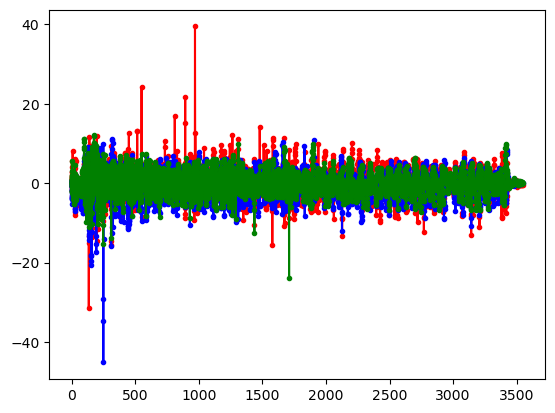

In [110]:
#Show Training Data
def showXTrainingData(data):
  print(data.shape)
  print(data.columns)
  plt.plot(data['z'], color='red', marker='.')#
  plt.plot(data['y'], color='blue', marker='.')#
  plt.plot(data['x'], color='green', marker='.')#
  plt.plot(data['qz'], color='yellow', marker='.')#
  plt.plot(data['qy'], color='black', marker='.')#
  plt.plot(data['qx'], color='orange', marker='.')#
  plt.plot(data['qw'], color='pink', marker='.')#
  plt.plot(data['roll'], color='purple', marker='.')#
  plt.xlabel('time')
  plt.ylabel('x,y,z,qz,qy,qx,qw,roll')
  plt.legend(['z', 'y', 'x', 'qz', 'qy', 'qx', 'qw', 'roll'])
  plt.title('Train Data')
  plt.show()

showXTrainingData(X_train)


### 4. Train Model

In [111]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

#shuffle data and then split

KNeighborsClassifier(n_neighbors=3, weights='distance')

### 5. Predict

In [112]:
y_pred = knn.predict(X_test)
print(len(y_test))

4719


### 6. Evaluate

In [114]:
#Confusion Matrix
#label confustion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100, '%')

#Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: ', recall * 100, '%')

Confusion Matrix: 
 [[   0 1321 2322]
 [   0 1076    0]
 [   0    0    0]]
Accuracy:  22.801440983259166 %
Recall:  22.801440983259166 %


c:\Users\marvi\anaconda3\envs\ML4B-App\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
#export the model with pickle
filename = 'knn.pickle'
pkl.dump(knn, open(filename, 'wb'))


In [55]:
#Split Data Mixed
X_mixed = df_mixed.drop(['label'], axis=1)
y_mixed = df_mixed['label']
X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(X_mixed, y_mixed, test_size=0.3)

#KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
y_pred_mixed = knn.predict(X_test)



NameError: name 'df_mixed' is not defined

**Export Model into Pickle**

# Sonstiges

In [ ]:
#take the uploaded file and load it into a dataframe and then apply the model to it
#df = pd.read_csv('uploaded_file.csv')
#model = pickle.load(open('knn.pkl', 'rb'))
#model.predict(df)


Lösung von ChatGpt, leider nicht so einfach...

In [ ]:
# Daten laden
training_data = df.drop(['label'], axis=1)
training_labels = df['label']

# Sensordaten in eine zweidimensionale Form umwandeln
training_data = training_data.reshape(training_data.shape[0], -1)


# KNN-Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(training_data, training_labels)

# Sensordaten für eine neue Instanz
new_data = df_test
new_data = new_data.reshape(1, -1)

# Vorhersage für die neue Instanz
prediction = knn.predict([new_data])

# Wahrscheinlichkeiten der Vorhersagen
probabilities = knn.predict_proba([new_data])

# Index der vorhergesagten Klasse
predicted_class_index = prediction[0]

# Wahrscheinlichkeit der vorhergesagten Klasse
predicted_class_probability = probabilities[0][predicted_class_index]

# Klassenbezeichnungen
class_names = ['Jumping Jacks', 'Pushups', 'Laufen']

# Ergebnis ausgeben
result = f"Mit {predicted_class_probability*100:.2f}% Sicherheit hat die Person {class_names[predicted_class_index]} gemacht."
print(result)
